## 1. Frontal face detection (Dlib, HOG-based)

In [7]:
###  you can call face_detector.py
## %run -i face_detector.py obama.jpg

In [8]:
# copied core code from face_detector.py

import dlib
from skimage import io

detector = dlib.get_frontal_face_detector()

# load an image
filename = "obama.jpg"
img = io.imread(filename)

# detect face
# The 1 in the second argument indicates that we should upsample the image 1 time.  
# This will make everything bigger and allow us to detect more faces.
dets = detector(img, 1)

print("Number of faces detected: {}".format(len(dets)))
for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
          i, d.left(), d.top(), d.right(), d.bottom()))


Number of faces detected: 1
Detection 0: Left: 163 Top: 68 Right: 270 Bottom: 175


(549, 440, 3)
Detection [(163, 68) (270, 175)], score: 2.3003366627229567, face_type:0


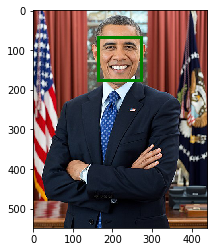

In [11]:
## plot result
from matplotlib import pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

print(img.shape)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')

ax1.imshow(img)

for i, d in enumerate(dets):
    print("Detection {}, score: {}, face_type:{}".format(d, scores[i], idx[i]))    
    
    if scores[i] > 0:
        # plot detected face with positve score in green
        ax1.add_patch(
            patches.Rectangle(
                (d.left(), d.top()),   # (x,y)
                d.width(),          # width
                d.height(),          # height
                fill=False,      # remove background
                edgecolor="green", linewidth=3
            )
        )
    else:
        # plot detected face with negative score in red
        ax1.add_patch(
            patches.Rectangle(
                (d.left(), d.top()),   # (x,y)
                d.width(),          # width
                d.height(),          # height
                fill=False,      # remove background
                edgecolor="red", linewidth=3
            )
        )

    
fig1.savefig('detected_faces.png', dpi=90, bbox_inches='tight')


## 2. Multi-view face detection (Dlib, CNN-based)
*TO BE UPDATED*